In [12]:
import numpy as np
import pandas as pd
import random
import csv
import os
import matplotlib.pyplot as plt
from collections import defaultdict
import pprint
from tqdm import tqdm

import imageio
import shapefile
from json import dumps
import fiona
from pyproj import Proj#, transform
import pyproj
import geopandas

import shapely
from shapely.geometry import Polygon
from shapely.geometry import shape
from functools import partial
from shapely.ops import transform
from shapely.strtree import STRtree

# Transform labels to polygon

In [2]:
df = pd.read_csv('../mount/data/GeneralBlockchain/demo_results/structure.csv')
base_dir = '../mount/data/GeneralBlockchain/demo_results/'

In [3]:
df.head()

,#,Taxonomy,Class,Template Name,Template Image,File Folder,Image,Filename,Tag,Mask,...,Left,Width,Height,Points,Text Annotation,Minimal Top,Minimal Left,Minimal Width,Minimal Height,Attributes
0,1,NaN,SSM Stanford Test,NaN,NaN,NaN,images/1fc9a2dd4c098b77299cfe0d6e65d9d3151399b...,airbus_geowiki_A02.png,tags/8Fz6Tzj9W8XFSo5MY_WvxDQmNADBsp56xT2.jpeg,masks/8Fz6Tzj9W8XFSo5MY_WvxDQmNADBsp56xT2.png,...,0,910,905,NaN,NaN,0.0,0.0,910.0,905.0,NaN
1,2,NaN,SSM Stanford Test,Crop,NaN,NaN,images/1fc9a2dd4c098b77299cfe0d6e65d9d3151399b...,airbus_geowiki_A02.png,tags/8Fz6Tzj9W8XFSo5MY_drcfXT4TLRJ6263hR.jpeg,masks/8Fz6Tzj9W8XFSo5MY_drcfXT4TLRJ6263hR.png,...,443,83,174,NaN,NaN,375.0,443.0,83.0,174.0,NaN
2,3,NaN,SSM Stanford Test,Background,NaN,NaN,images/1fc9a2dd4c098b77299cfe0d6e65d9d3151399b...,airbus_geowiki_A02.png,tags/8Fz6Tzj9W8XFSo5MY_s7fiD8J9orZZ6D3rh.jpeg,masks/8Fz6Tzj9W8XFSo5MY_s7fiD8J9orZZ6D3rh.png,...,0,910,905,NaN,NaN,0.0,0.0,910.0,905.0,NaN
3,4,NaN,SSM Stanford Test,NaN,NaN,NaN,images/757aae0779c4aad5ad3f15072309f7246705b84...,airbus_geowiki_A03.png,tags/26KHeD6C7EeNbBHYG_nNG6pyJ2CtM2ucgoJ.jpeg,masks/26KHeD6C7EeNbBHYG_nNG6pyJ2CtM2ucgoJ.png,...,0,908,903,NaN,NaN,0.0,0.0,908.0,903.0,NaN
4,5,NaN,SSM Stanford Test,Background,NaN,NaN,images/757aae0779c4aad5ad3f15072309f7246705b84...,airbus_geowiki_A03.png,tags/26KHeD6C7EeNbBHYG_kCphgWAPf6imrFDuG.jpeg,masks/26KHeD6C7EeNbBHYG_kCphgWAPf6imrFDuG.png,...,0,908,903,NaN,NaN,0.0,0.0,908.0,903.0,NaN


In [8]:
full_labels = df[df['Template Name'].isna() & ~df['Mask'].isna()].reset_index(drop=True)

[[  0   0   0]
 [ 65 209  39]]


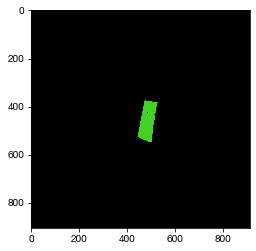

[[  0   0   0]
 [217  56  94]]


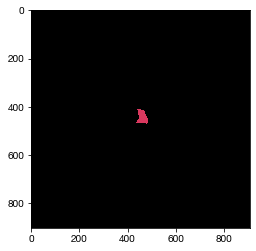

KeyboardInterrupt: 

In [26]:
for i, row in full_labels.iterrows():
    mask = imageio.imread(os.path.join(base_dir, row['Mask']))
    print(np.unique(mask[:,:,:3].reshape(-1, 3), axis=0))
    plt.imshow(mask)
    plt.show()

In [27]:
crop_color = [ 65, 209,  39]
noncrop_color = [217,  56,  94]